Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [241]:
# Import modules
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import folium

In [255]:
# Join data and create new DataFrame
bikes = pd.read_csv('sobi_bikes')
yelp = pd.read_csv('yelp')

frames = (bikes, yelp)
df3 = pd.concat(frames)

# Save the DataFrame as a csv
df3.to_csv('join_df', sep=',')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

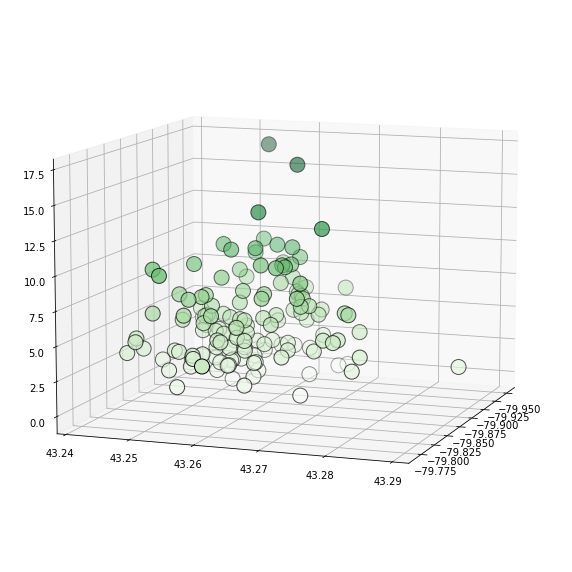

In [237]:
# Create a scatterplot to help visualize the data regarding the location of bike stations and the amount of available bikes

# Import DataFrame
df = pd.read_csv('sobi_bikes')
df['longitude'] = round(df['longitude'],3)
df['latitude'] = round(df['latitude'],3)

df2 = df[['latitude', 'longitude', 'free_bikes']]
df2

fig = plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')

# Create a 3-D scatterplot comparing the amount of bikes available to their coordinates
zline = df2['free_bikes']
xline = df2['longitude']
yline = df2['latitude']
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens', edgecolors='black', s=15**2)
ax.view_init(10, 20);

In [260]:
# For another persepecitve, create a map that displays the location on a geomap of each bike station and the amount of available bikes

df = pd.read_csv('sobi_bikes')
df['longitude'] = df['longitude']
df['latitude'] = df['latitude']

df2 = df[['address', 'latitude', 'longitude', 'free_bikes']]

m = folium.Map(location=[43.27, -79.87], zoom_start=13.5)

for i in range(0, len(df)):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
        popup=df.iloc[i]['free_bikes']).add_to(m)

m

GitHub does not full render the map made (download file to interact with map, otherwise screenshot below):
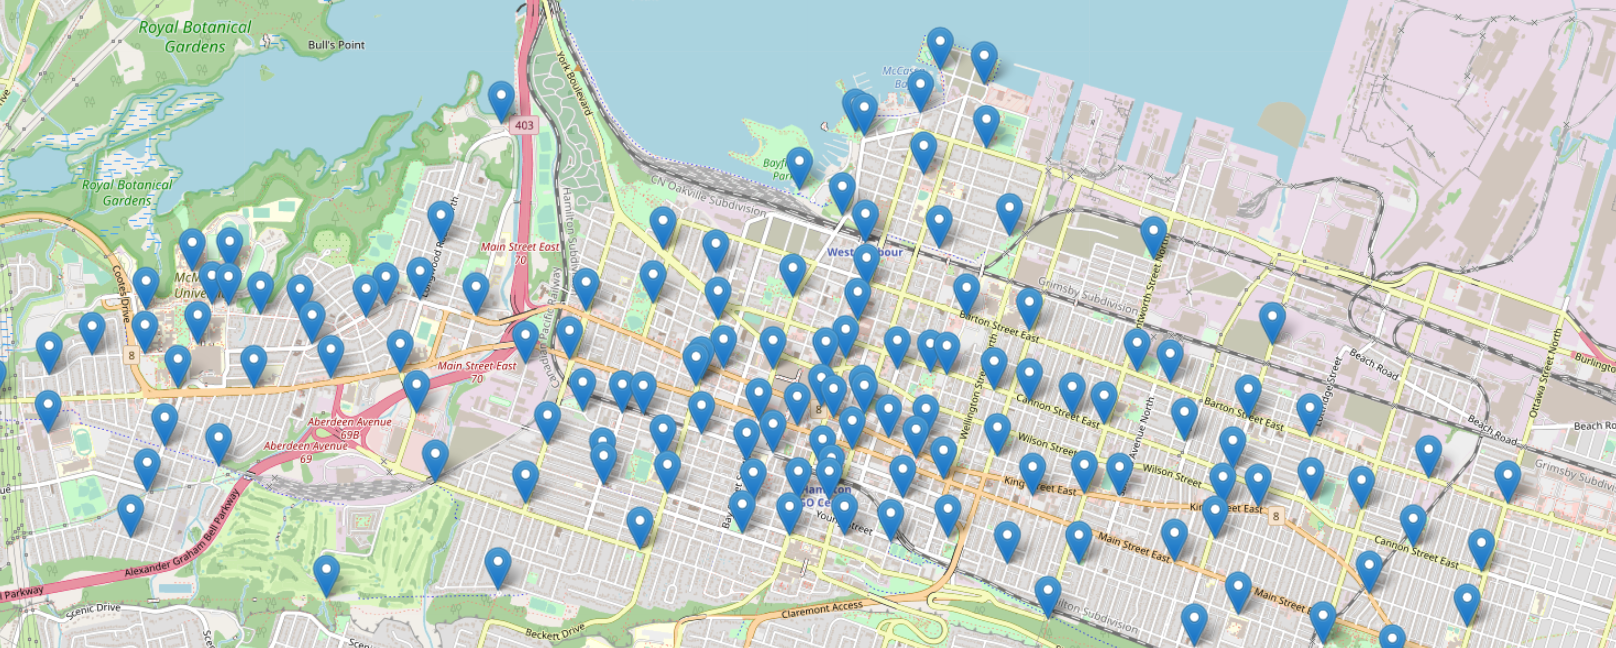

# Database

In [124]:
# Import modules

import sqlite3
from sqlite3 import Error

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [125]:
# Create local SQLite Database
conn = sqlite3.connect('modelling.db')
c = conn.cursor()

In [126]:
# Load sobi_bikes DataFrame into SQL db
sobi_bikes.to_sql('free_bikes', conn, if_exists='replace')

143

In [127]:
# Run test query on free_bikes table
c.execute('SELECT * FROM free_bikes')

for row in c.fetchall():
    print(row)

(0, '15 Hess Street North, Hamilton', 5, -79.87721174955368, 43.259125842121065, '43.259125842121065%2C-79.87721174955368')
(1, 'Harbour Front Drive, North End, Hamilton, Ontario', 12, -79.87132698297499, 43.26928827622911, '43.269288276229105%2C-79.87132698297499')
(2, '325 Bay Street North, Hamilton', 3, -79.8679232597351, 43.26785864558976, '43.26785864558976%2C-79.8679232597351')
(3, '177, Bay Street North, Hess Village, Hamilton, Ontario', 9, -79.87180307507515, 43.26319844157448, '43.263198441574474%2C-79.87180307507515')
(4, '58 Bay Street South, Hamilton', 7, -79.8744987564414, 43.2561324863605, '43.2561324863605%2C-79.8744987564414')
(5, '100 Bold Street, Hamilton', 10, -79.8753935613187, 43.2538302267771, '43.2538302267771%2C-79.8753935613187')
(6, '232 James Street South, Hamilton', 5, -79.8720555723035, 43.2496354495324, '43.2496354495324%2C-79.8720555723035')
(7, '40-48 Oxford Street, Hamilton', 6, -79.8777937889099, 43.26456372689135, '43.26456372689135%2C-79.877793788909

In [256]:
# Load yelp DataFrame into SQL db
yelp.to_sql('yelp', conn, if_exists='replace', index=False)

2707

In [129]:
# Run test query on yelp table
c.execute('SELECT * FROM yelp')

for row in c.fetchall():
    print(row)

('258 Locke Street S', 'Earth To Table : Bread Bar', 4.0, "[{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'sandwiches', 'title': 'Sandwiches'}]", 43.25284, -79.88702)
('96 George Street', 'Electric Diner', 4.0, "[{'alias': 'diners', 'title': 'Diners'}, {'alias': 'burgers', 'title': 'Burgers'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}]", 43.25845, -79.878)
('41 King William Street', 'The Mule', 4.0, "[{'alias': 'mexican', 'title': 'Mexican'}]", 43.25726, -79.86713)
('31 King William Street', 'Berkeley North', 4.5, "[{'alias': 'bars', 'title': 'Bars'}, {'alias': 'newcanadian', 'title': 'Canadian (New)'}]", 43.2574045478956, -79.8677145254958)
('43 King William Street', 'Diplomat', 4.0, "[{'alias': 'venues', 'title': 'Venues & Event Spaces'}, {'alias': 'newcanadian', 'title': 'Canadian (New)'}]", 43.2572440040624, -79.8670820519328)
('49 King William Street', 'Hambrgr', 4.5, "[{'alias': 'burgers', 'title': 'Burgers

In [257]:
# Load fsq DataFrame into SQL db
fsq.to_sql('fsq', conn, if_exists='replace', index=False)

5616

In [131]:
# Run test query on fsq table
c.execute('SELECT * FROM fsq')

for row in c.fetchall():
    print(row)

(0, '4 Queen St S', 'Scottish Rite', 7.9, "[{'id': 10032, 'name': 'Night Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]")
(1, '24 Hess St S', 'Gown & Gavel', 7.5, "[{'id': 13003, 'name': 'Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}}, {'id': 13049, 'name': 'Diner', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/diner_', 'suffix': '.png'}}]")
(2, '112 George St', "Smoke's Poutinerie", 7.5, "[{'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}, {'id': 13326, 'name': 'Poutine Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}, {'id': 13383, 'name': 'Steakhouse', 'icon': {'prefix': 'htt

Look at the data before and after the join to validate your data.

In [258]:
# Verify if the length of data is different
len(df3) == len(bikes) == len(yelp)

# We are given a False output, but this makes sense as we are joining data with differing rows and columns together. 

False